In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

%matplotlib inline

## ETL of Titanic data

Firstly, we carried out the Extraction, Transformation and Loading (ETL) of the Titanic data. Then, we carried out data wrangling (cleaning). Finally, we conduct logistic regression analysis to predict the survival of passengers in Titanic. More importanatly, the precision and accuracy of the predictive model were established. 

In [2]:
Tb = pd.read_excel(r'C:\Users\PC\Downloads\titanic3.xls')

In [3]:
# To view the first few rows.

Tb.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# To determine the dimension of the Titanic dataset

Tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [5]:
# To dertermine the number of passegers that boarded the titanic ship

print('#  of passengers in the Titanic data:' +str(len(Tb.index)))



#  of passengers in the Titanic data:1309


In [6]:
# To determine the categorical variables/attributtes of the Titanic dataset

Categorical_attributes = Tb.select_dtypes(include= ['object'])


# We observe that there are 7 categorical attributes in the data; namely; name, sex, ticket, cabin, embarked, boat, home dest.

In [7]:
Categorical_attributes

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
5,"Anderson, Mr. Harry",male,19952,E12,S,3,"New York, NY"
6,"Andrews, Miss. Kornelia Theodosia",female,13502,D7,S,10,"Hudson, NY"
7,"Andrews, Mr. Thomas Jr",male,112050,A36,S,NaN,"Belfast, NI"
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,11769,C101,S,D,"Bayside, Queens, NY"
9,"Artagaveytia, Mr. Ramon",male,PC 17609,NaN,C,NaN,"Montevideo, Uruguay"


In [8]:
# To determine the Numerical attributtes of the Titanic dataset

Numerical_attributes = Tb.select_dtypes(include= ['int', 'float'])

# We observe that there are 3 numerical attributes/variable. namely; Age, fare, body

In [9]:
Numerical_attributes

,age,fare,body
0,29.0000,211.3375,NaN
1,0.9167,151.5500,NaN
2,2.0000,151.5500,NaN
3,30.0000,151.5500,135.0
4,25.0000,151.5500,NaN
5,48.0000,26.5500,NaN
6,63.0000,77.9583,NaN
7,39.0000,0.0000,NaN
8,53.0000,51.4792,NaN
9,71.0000,49.5042,22.0


#We have been able to import the data and observe important features that can help in creating insights for intelligence reporting. In the next section, we shall look into the data cleaning which the most crucial part of the job.

## Data Wrangling

In this section, we dealt with  data wrangling (cleaning) which involves; removing missing values, duplicates, columns/row etc.

In [11]:
# To look for missing values

Tb.isnull().sum()

# The output shows that age, cabin, embark, body and home.dest have missing values with most occuring from body column.

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

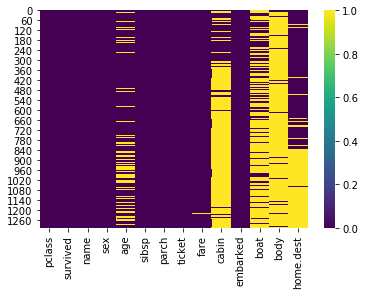

In [12]:
sns.heatmap(Tb.isnull(), cmap = 'viridis')

#The plot gives overview of the number of missing values in each columns.  

In [28]:
# To remove irrelevant columns with missing values.

Categorical_attributes.drop(["cabin"], axis =1, inplace = True)


C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [29]:
Categorical_attributes

,sex,embarked
0,female,S
1,male,S
2,female,S
3,male,S
4,female,S
5,male,S
6,female,S
7,male,S
8,female,S
9,male,C


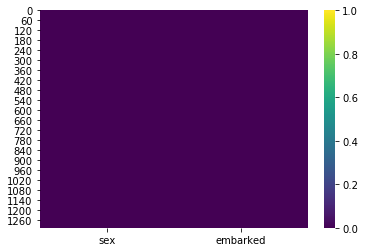

In [30]:
#To validate that there is no more missing values in Categorical atrributes.

sns.heatmap(Categorical_attributes.isnull(), cmap = 'viridis')

#The output shows that categorical attributes is cleaned

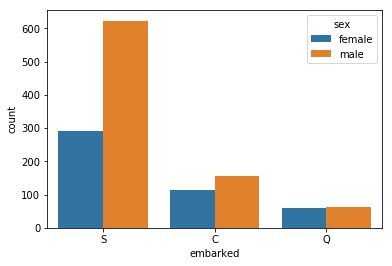

In [31]:
sns.countplot( x = "embarked", hue = "sex", data = Categorical_attributes )

The countplot chart shows that population of male passengers that embark on S is more than twice the population of the female of S. Consequently, the number of male that embarked on C outnumbered that of female. 

In [33]:
Numerical_attributes.drop("body", axis = 1, inplace = True)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
Numerical_attributes

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500
5,48.0000,26.5500
6,63.0000,77.9583
7,39.0000,0.0000
8,53.0000,51.4792
9,71.0000,49.5042


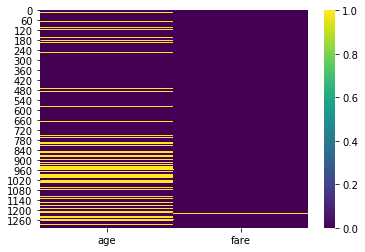

In [35]:
sns.heatmap(Numerical_attributes.isnull(), cmap = 'viridis')

In [36]:
Numerical_attributes.isnull().sum()

age     263
fare      1
dtype: int64

The yellow patterns of the chart shows the presence of some missing value which was established with the .isnull().sum() 

In [37]:
Numerical_attributes.dropna(inplace = True)

C:\Users\PC\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
Numerical_attributes

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500
5,48.0000,26.5500
6,63.0000,77.9583
7,39.0000,0.0000
8,53.0000,51.4792
9,71.0000,49.5042


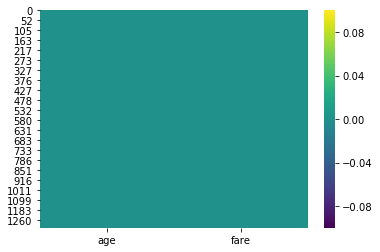

In [39]:
sns.heatmap(Numerical_attributes.isnull(), cmap = 'viridis')

# The output shows that numerical attributes is cleaned.

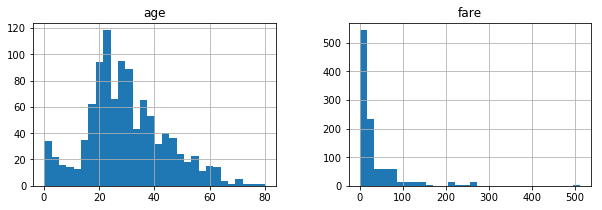

In [40]:
Numerical_attributes.hist(bins= 30, figsize =(10,3) )
plt.show()

The age distribution is skewed to the right. Majority of the passengers are in the age bracket 22 to 25 years and the oldest passenger is of age 80 years.

## Alternative method

We started cleaning the data by removing irrelevant columns. Then, we checked for missing values in the remaining columns and cleaned up  accordingly. 

In [70]:
Tb.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [73]:
#To remove irrelevant columns

Tb.drop(["name","sibsp","parch","ticket","fare","cabin","boat","body","home.dest"], axis=1, inplace = True )

In [74]:
Tb

,pclass,survived,sex,age,embarked
0,1,1,female,29.0000,S
1,1,1,male,0.9167,S
2,1,0,female,2.0000,S
3,1,0,male,30.0000,S
4,1,0,female,25.0000,S
5,1,1,male,48.0000,S
6,1,1,female,63.0000,S
7,1,0,male,39.0000,S
8,1,1,female,53.0000,S
9,1,0,male,71.0000,C


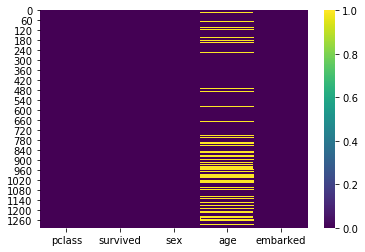

In [75]:
#To check the status of the dataset after removing irrelevant columns

sns.heatmap(Tb.isnull(), cmap ='viridis')

#The output reveals that we had some missing values in age column

In [77]:
#To clean up the missing values in age column and anywhere else.

Tb.dropna(inplace=True)

In [78]:
#To confirm the cleanliness of the data 

Tb.isnull().sum()

pclass      0
survived    0
sex         0
age         0
embarked    0
dtype: int64

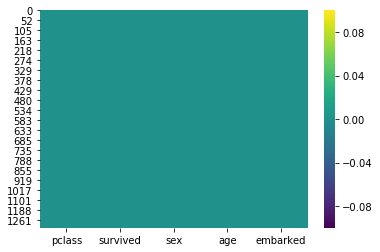

In [79]:
sns.heatmap(Tb.isnull(), cmap ='viridis')

#The output chart justify the claim that the data is cleaned for further analysis

## Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000066407E4B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000006640C96630>]], dtype=object)

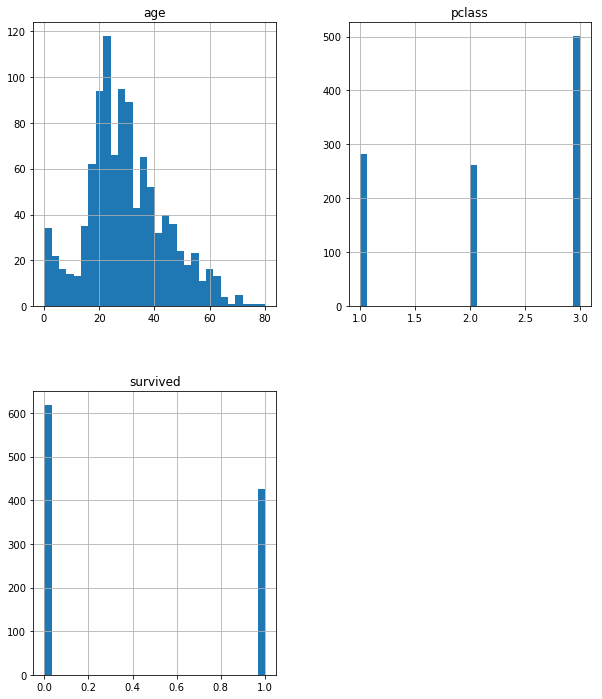

In [83]:
#To determine the distribution of the dataset. 

Tb.hist(bins = 30, figsize = (10,12))

From the charts, we obtained the following information:

1. The top left output chart tells about age distribution of the passengers, which is skewed to the right. Majority of the passengers are in the age bracket 22 to 25 years and the oldest passenger is of age 80 years.
2. The top right output chart reveals that large proporton of the passengers belong to pclass_3 category.
3. The down left output chart shows that majority of the passengers could not survive it.


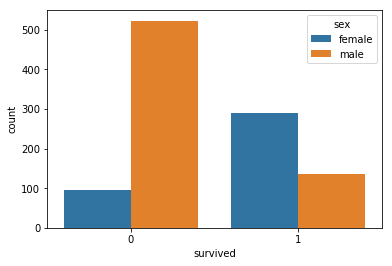

In [85]:
sns.countplot( x = "survived", hue = "sex", data = Tb )

 More than 5 times the number of female that survive it, accounts for the number of males that couldn't survive it. Thus, larger proportion of the male passenger couldn't survive it. On the contrary, the number of female that survived twice the number of male that survived it. 

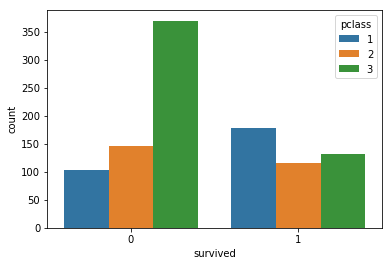

In [92]:
sns.countplot( x = "survived", hue = "pclass", data = Tb )

More of the pclass_3 category couldn not survive it while majority of the pclass_1 category survived. 

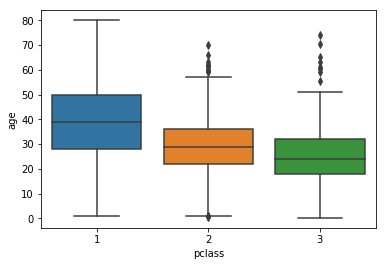

In [89]:
sns.boxplot( x = "pclass", y = "age", data = Tb )

Many of the passengers that  are of older ages belongs to pclass_1 category

In [103]:
# The sex column (categorical variable) generated data structure that can be grouped into dummy variables

pd.get_dummies(Tb["sex"])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [112]:
# To remove one of the columns since 0 = male and 1 = female under Female and same for male column, we can remove the first couln

sex = pd.get_dummies(Tb["sex"], drop_first = True)

In [113]:
sex

,male
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0
9,1


In [169]:
# We appply the same to embarked and pclass column as well

pd.get_dummies(Tb["embarked"])

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [170]:
 embarked = pd.get_dummies(Tb["embarked"], drop_first = True)

In [201]:
embarked

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,0


In [202]:
pd.get_dummies(Tb["pclass"])

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [203]:
pclass = pd.get_dummies(Tb["pclass"], drop_first = True)

In [204]:
pclass

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [208]:
Tb = pd.concat([Tb,sex, embarked, pclass], axis = 1)
Tb.drop("embarked", axis =1)
Tb.head()

,pclass,survived,sex,age,embarked,male,Q,S,2,3,...,male,Q,S,2,3,male,Q,S,2,3
0,1,1,female,29.0000,S,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,male,0.9167,S,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2,1,0,female,2.0000,S,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,male,30.0000,S,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
4,1,0,female,25.0000,S,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [216]:
Tb = Tb.drop("embarked", axis =1)

Tb.head()

,pclass,survived,sex,age,male,Q,S,2,3,male,...,male,Q,S,2,3,male,Q,S,2,3
0,1,1,female,29.0000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,male,0.9167,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,0,female,2.0000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,male,30.0000,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
4,1,0,female,25.0000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [223]:
Tb.drop("sex", axis =1, inplace = True)
Tb.head()

,pclass,survived,age,male,Q,S,2,3,male,Q,...,male,Q,S,2,3,male,Q,S,2,3
0,1,1,29.0000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0.9167,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,1,0,2.0000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,30.0000,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
4,1,0,25.0000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [224]:
Tb.head(5)

,pclass,survived,age,male,Q,S,2,3,male,Q,...,male,Q,S,2,3,male,Q,S,2,3
0,1,1,29.0000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0.9167,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,1,0,2.0000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,30.0000,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
4,1,0,25.0000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [227]:
#To remove duplicate columns

Tb = Tb.loc[:,~Tb.columns.duplicated()]

In [228]:
Tb.head(5)

,pclass,survived,age,male,Q,S,2,3
0,1,1,29.0000,0,0,1,0,0
1,1,1,0.9167,1,0,1,0,0
2,1,0,2.0000,0,0,1,0,0
3,1,0,30.0000,1,0,1,0,0
4,1,0,25.0000,0,0,1,0,0


## Logistics regression analysis


In [229]:
# Firstly, we define the dependent and the independent variable. Then, import necessary modules and libraries. 

X = Tb.drop("survived", axis = 1)
y = Tb["survived"]

In [230]:
from sklearn.cross_validation import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
logmodel=LogisticRegression()

In [234]:
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [235]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [236]:
predictions = logmodel.predict(X_test)

In [237]:
from sklearn.metrics import classification_report

In [239]:
classification_report(y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.80      0.81      0.81       180\n          1       0.74      0.73      0.74       134\n\navg / total       0.78      0.78      0.78       314\n'

In [240]:
from sklearn.metrics import confusion_matrix

In [241]:
confusion_matrix(y_test,predictions)

array([[146,  34],
       [ 36,  98]], dtype=int64)

In [242]:
from sklearn.metrics import accuracy_score

In [243]:
accuracy_score(y_test,predictions)

0.77707006369426757

The logistics model created for predictions has approximately 78% accuracy and 80% precision. 

## Summary

Titanic is well known incident in the world history. We extracted, transformed, loaded and imported the Titanic dataset into Python Jupiter Notebook. Then, we carried out Exploratory data analysis as well as logistic regression analysis to predict survivals. 

During the exporatory process, we observe that there are 1309 passengers in the Titanic ship with age distribution skewed to the right. majority of the passengers are in the age bracket 22 to 25 years and the oldest passenger is of age 80 years.

Pclass-wise,large proporton of the passengers belong to pclass_3 category.

More of the passengers could not survive.  More than 5 times the number of female that survive is the number of males that couldn't survive. Thus, larger proportion of the male passenger couldn't survive. On the contrary, the number of female that survived twice the number of male that survived.

Many of the passengers that are of older ages belongs to pclass_1 category. The logistics model created for predictions has approximately 78% accuracy and 80% precision.




Thanks for reading!